# Course Name: Visualisation for Data Analytics
# Objective: Classification

### In this lab, we will focus on building a sms spam classifier. 

### Import Libraries 

### Q1. Load the dataset.

Note: We'll be using a dataset from the UCI datasets! Go to https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection and download the zip file. Unzip it in the same place as whatever notebook your working in. Or just make sure to know the exact path to the data so you can put into your code later on.
The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the readme file for more info.


In [ ]:
import pandas as pd

In [ ]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Q2. Basic Exploratory Data Analysis. Use groupby to describe by label, this way we can begin to think about the features that separate ham and spam!




In [ ]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### Q3. Make a new column to detect how long the text messages and make a histogram using length(use bins=50)? 

In [ ]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

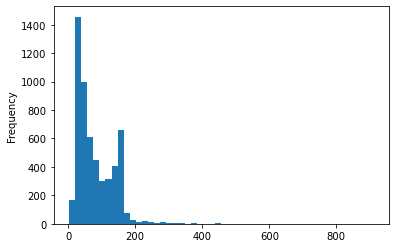

In [ ]:

messages['length'].plot(bins=50, kind='hist') 


### Q5. Find if the message length is a distinguishing feature between ham and spam?

In [ ]:
messages.length.describe()


count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

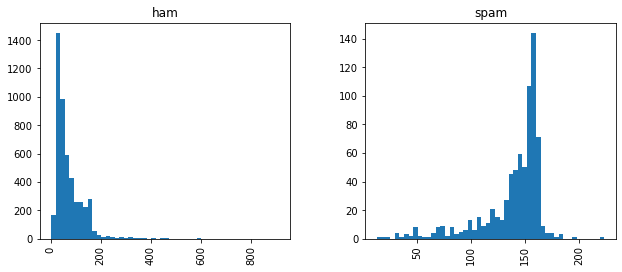

In [ ]:
messages.hist(column='length', by='label', bins=50,figsize=(10,4))


##### Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters. (Sorry Romeo!)




### Q6. Apply basic  Text pre-processing for example,   Remove all punctuation,  Remove all stopwords, Returns a list of the cleaned text?

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

messages['message'].head(5).apply(text_process)


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
messages.head()


,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Q7. Create pipeline for Bag of Word conversion, tf-idf conversion and choose multinomialNB() Classifier?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
len(bow_transformer.vocabulary_)

11425

In [ ]:
message4 = messages['message'][3]
message4


'U dun say so early hor... U c already then say...'

In [ ]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


##### This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:

In [ ]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [ ]:
messages_bow = bow_transformer.transform(messages['message'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz) 
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [ ]:
#We'll go ahead and check what is the IDF (inverse document frequency) of the word "u"? Of word "university"?


print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [ ]:
#To transform the entire bag-of-words corpus into TF-IDF corpus at once:

messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


### Q8. Divide the data into train (80%) and test (20%)?

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3]) 

predicted: ham
expected: ham


### Q9. Perform training and testing, also print various metrics for example, accuracy, f1-score etc.

In [ ]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)
from sklearn.metrics import classification_report
print(classification_report(messages['label'], all_predictions))

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [ ]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(msg_train,label_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7feedcb68c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(msg_test)


In [ ]:
print(classification_report(predictions,label_test))


              precision    recall  f1-score   support

         ham       1.00      0.95      0.97      1006
        spam       0.67      1.00      0.80       109

    accuracy                           0.95      1115
   macro avg       0.83      0.97      0.89      1115
weighted avg       0.97      0.95      0.96      1115



### Extra

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
x = messages_tfidf
y= messages.label

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.20, random_state = 0)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(xtrain, ytrain)


In [ ]:
# Predicting
y_pred = spam_detect_model.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

# Evaluating
cm = confusion_matrix(ytest, y_pred)
cm

array([[955,   0],
       [ 37, 123]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, spam_detect_model.predict(xtest)))
print (classification_report(ytest, spam_detect_model.predict(xtest)))

Accuracy : 0.96682 


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       955
           1       1.00      0.77      0.87       160

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.96      1115



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=50)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=50)

In [ ]:
# Predicting
y_pred_dt = dt.predict(xtest)

In [ ]:
# Results 
# Evaluating
cm = confusion_matrix(ytest, y_pred_dt)

print(cm)

[[951   4]
 [ 22 138]]


In [ ]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, dt.predict(xtest)))
print (classification_report(ytest, dt.predict(xtest)))

Accuracy : 0.97668 


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       0.97      0.86      0.91       160

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Credit:
#### More details can be found on the following Udemy link: https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/NLP%20%28Natural%20Language%20Processing%29.ipynb

### More resources
http://www.nltk.org/book/
https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

### Example consisting of more machin learning classifiers
https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2



**Lectoror's ANS**

In [ ]:
#In this lab, we will focus on building a sms spam classifier.
#Import Libraries
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
#Q1. Load the dataset.
'''
Note: We'll be using a dataset from the UCI datasets! Go to https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection and download the zip file. Unzip it in the same place as whatever notebook your working in. Or just make sure to know the exact path to the data so you can put into your code later on. The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the readme file for more info.
'''
messages = pandas.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
print(messages.head())

In [ ]:
#Q2. Basic Exploratory Data Analysis. Use groupby to describe by label, this way we can begin to think about the features that separate ham and spam!

In [ ]:
print(messages.groupby('label').describe())

In [ ]:
#Q3. Make a new column to detect how long the text messages and make a histogram using length(use bins=50)?

In [ ]:
messages['length'] = messages['message'].apply(len)

messages['length'].plot(bins=50, kind='hist') 

In [ ]:
#Q4. Print the content of the message that has largest length?


In [ ]:
messages.length.describe()

In [ ]:
#Woah! 910 characters, let's use masking to find this message:
messages[messages['length'] == 910]['message'].iloc[0] 
#Looks like we have some sort of Romeo sending texts!


In [ ]:
#Q5. Find if the message length is a distinguishing feature between ham and spam?


In [ ]:
messages.hist(column='length', by='label', bins=50,figsize=(10,4))


In [ ]:
#Q6. Apply basic Text pre-processing for example, Remove all punctuation, Remove all stopwords, Returns a list of the cleaned text?

In [ ]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
# Check to make sure its working
print(messages['message'].head(5).apply(text_process))

In [ ]:
#Q7. Create pipeline for Bag of Word conversion, tf-idf conversion and choose multinomialNB() Classifier?


In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
#Q8. Divide the data into train (80%) and test (20%)?


In [ ]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print( len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

In [ ]:
#Q9. Perform training and testing, also print various metrics for example, accuracy, f1-score etc.


In [ ]:
pipeline.fit(msg_train,label_train)

predictions = pipeline.predict(msg_test)
print( classification_report(predictions,label_test))